# Installation and setup

In [1]:
import tensorflow as tf


In [3]:
print(tf.__version__)

2.11.0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Data Preprocessing

In [5]:
from sklearn import datasets, metrics

In [6]:
cancer = datasets.load_breast_cancer()

In [7]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [11]:
x = pd.DataFrame(data = cancer.data, columns=cancer.feature_names)

In [18]:
y = cancer.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [19]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [20]:
x.shape, y.shape

((569, 30), (569,))

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 0)

In [24]:
x_train.shape, x_test.shape

((455, 30), (114, 30))

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [27]:
x_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [28]:
x_train.shape, x_test.shape

((455, 30), (114, 30))

In [29]:
x_train = x_train.reshape(455, 30, 1)
x_test = x_test.reshape(114, 30, 1)

In [30]:
x_train.shape, x_test.shape

((455, 30, 1), (114, 30, 1))

# Building the Model

In [32]:
model = tf.keras.models.Sequential()


In [33]:
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, activation='relu', input_shape = (30, 1)))

In [35]:
model.add(tf.keras.layers.BatchNormalization())

In [37]:
model.add(tf.keras.layers.Dropout(0.2))

In [38]:
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu'))

In [39]:

model.add(tf.keras.layers.BatchNormalization())

In [40]:
model.add(tf.keras.layers.Dropout(0.4))

In [41]:
model.add(tf.keras.layers.Flatten())

In [42]:
model.add(tf.keras.layers.Dense(units=64, activation='relu'))

In [43]:
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 29, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0

In [45]:
opt = tf.keras.optimizers.Adam(learning_rate=0.000005)

In [46]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Training the Model

In [96]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
15/15 [==============================] - 1s 34ms/step - loss: 0.0458 - accuracy: 0.9824 - val_loss: 0.0520 - val_accuracy: 0.9825
Epoch 2/30
15/15 [==============================] - 0s 26ms/step - loss: 0.0469 - accuracy: 0.9846 - val_loss: 0.0520 - val_accuracy: 0.9825
Epoch 3/30
15/15 [==============================] - 0s 22ms/step - loss: 0.0375 - accuracy: 0.9846 - val_loss: 0.0525 - val_accuracy: 0.9825
Epoch 4/30
15/15 [==============================] - 0s 12ms/step - loss: 0.0359 - accuracy: 0.9890 - val_loss: 0.0526 - val_accuracy: 0.9825
Epoch 5/30
15/15 [==============================] - 0s 11ms/step - loss: 0.0409 - accuracy: 0.9846 - val_loss: 0.0528 - val_accuracy: 0.9825
Epoch 6/30
15/15 [==============================] - 0s 11ms/step - loss: 0.0397 - accuracy: 0.9846 - val_loss: 0.0526 - val_accuracy: 0.9825
Epoch 7/30
15/15 [==============================] - 0s 14ms/step - loss: 0.0611 - accuracy: 0.9802 - val_loss: 0.0525 - val_accuracy: 0.9825
Epoch 8/30
15

# Model Prediction

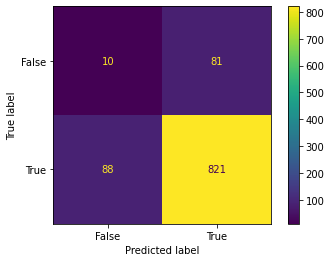

In [101]:


actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()


In [102]:
def learning_curve(history, epoch):
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()



# Learning Curve

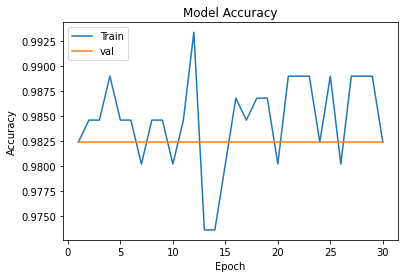

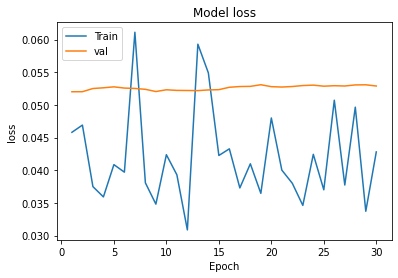

In [103]:
learning_curve(history, 30)